# Exercise Sheet 1a



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [ ]:
import numpy as np 
import pandas as pd

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
data_csv = pd.read_csv("./covertype.csv") 

#Random shuffle
data_csv = data_csv.sample(frac=1).reset_index(drop=True)
x = data_csv.iloc[:,np.arange(1,55).tolist()] 
y = data_csv["Cover_Type"]
print ("Feature set shape:", x.shape)
print("Labels shape:", y.shape)
train_set_number = int(x.shape[0] * 0.7)
train_x = x[: train_set_number].values
train_y = y[: train_set_number].values
test_x = x[train_set_number: ].values
test_y = y[train_set_number: ].values

print("samples in train set: ", train_x.shape)
print ("Samples in test set:", test_x.shape)

### Train a simple deep neural network
- Use Pytorch to define a simple Multi-Layer Perceptron with at least 3 layers
    - The input layer should have as many neurons as there are features
        - How many features are there?
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Pack your training and testing datasets in a class which inherits from torch.utils.data.Datset
    - features you input to your network should be of type torch.float
    - labels should be of type torch.long.
- Use a torch.utils.data.DataLoader to access your data in batches
- Train the MLP with your data from the train_loader using Cross-Entropy Loss and the Adam Optimizer
    - Make sure to save the training history for later assessment
- Evaluate the performance on your test_loader

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define your MLP
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(54, 64)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(64,128)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(128,7)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1,54)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.droput(x)
         # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.droput(x)
        # add output layer
        x = self.fc3(x)
        return x





In [3]:
# Create your DataLoaders

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
class DS(Dataset):

    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):

        sample = self.features[idx]
        label = self.labels[idx]

        return torch.tensor(sample).float(), torch.tensor(label)-1




In [22]:
# Instantiate the network, the optimizer and the Loss Criterion
model = Net()
criterion = nn.CrossEntropyLoss()
# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = 0.0000071)
dataset = DS(train_x, train_y)
test_dataset = DS(test_x, test_y)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



In [23]:
# Define your training Loop
def train_epoch(model, dataloader, criterion, optimizer): 
    model.train()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for i, (data, label) in enumerate(dataloader):  
        optimizer.zero_grad()  
        prediction = model(data) 
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        if i%1000 == 0:
            print ("Loss:  ", loss.item())
            print ("Accuracy: ", sum(torch.argmax(prediction, dim=1) == label)/ data.shape[0])
        samples += len(data)
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
    return epoch_loss, correct/samples


# Define your testing Loop
def test_epoch(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for data, label in dataloader: 
        prediction = model(data)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
    return epoch_loss, correct/samples
    


In [21]:
# Check if your training and testing loops are working
# for test in train_loader: 
train_epoch(model, train_loader, criterion, optimizer)
test_epoch(model, test_loader,  criterion)


Loss:   1.9448820352554321
Accuracy:  tensor(0.1250)


(tensor(546.5834), tensor(0.2507))

### Debug
- If there is a RuntimeError raised in you loss function, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [ ]:
# Inspect your data
import numpy as np

#working fine



In [ ]:
# Fix your data and recreate your DataLoaders





### Train your Network
- Reinitialize your MLP from above and train it for 100 epochs

In [ ]:
import tqdm
 

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(200):
    loss, accuracy = train_epoch(model, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(model, test_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

    

Loss:   93.61373901367188
Accuracy:  tensor(0.1250)
Loss:   10.636544227600098
Accuracy:  tensor(0.2500)
Loss:   5.025812149047852
Accuracy:  tensor(0.2500)
Loss:   3.86508846282959
Accuracy:  tensor(0.3125)


### Does it work?
- There should not be a RuntimeError raised now
- Does the network converge / Does the loss decrease?


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy
- Does the training stagnate?

In [7]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Train Loss")
plt.show()

plt.title("Train Accuracy")
plt.plot(train_accuracy)
plt.show()

plt.plot(test_loss)
plt.title("Test Loss")
plt.show()

plt.title("Test Accuracy")
plt.plot(test_accuracy)
plt.show()




NameError: name 'train_loss' is not defined

### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [8]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])
# print (x.mean(), x.max(), x.min(), x.std()) 
stats["Type"] = x.columns
stats["Min"] = x.min().tolist()
stats["Max"] = x.max().tolist()
stats["Mean"] = x.mean().tolist()
stats["Std"] = x.std().tolist()
# Compute the values for each column





display(stats)

,Type,Min,Max,Mean,Std
0,Elevation,1863,3849,2749.32,417.68
1,Aspect,0,360,156.68,110.09
2,Slope,0,52,16.50,8.45
3,Horizontal_Distance_To_Hydrology,0,1343,227.20,210.08
4,Vertical_Distance_To_Hydrology,-146,554,51.08,61.24
5,Horizontal_Distance_To_Roadways,0,6890,1714.02,1325.07
6,Hillshade_9am,0,254,212.70,30.56
7,Hillshade_Noon,99,254,218.97,22.80
8,Hillshade_3pm,0,248,135.09,45.90
9,Horizontal_Distance_To_Fire_Points,0,6993,1511.15,1099.94


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [9]:
from sklearn import preprocessing
train_x_norm = preprocessing.scale(train_x, axis=0)
scaler = preprocessing.StandardScaler().fit(train_x)
test_x_norm = scaler.transform(test_x)

print ("Test std:", test_x_norm.std(), "Test Mean: ", test_x_norm.mean())

Test std: 1.003565258758563 Test Mean:  0.0007964145630486924


In [10]:
scaler.mean_

array([2.74915514e+03, 1.56292234e+02, 1.65028345e+01, 2.26984033e+02,
       5.12154195e+01, 1.71451956e+03, 2.13069633e+02, 2.18920257e+02,
       1.34586451e+02, 1.51407379e+03, 2.39040060e-01, 3.39191232e-02,
       4.15910809e-01, 3.11130008e-01, 2.23922902e-02, 4.07218443e-02,
       6.48148148e-02, 5.65003779e-02, 1.19992441e-02, 4.29894180e-02,
       0.00000000e+00, 9.44822373e-05, 4.72411187e-04, 1.39455782e-01,
       2.83446712e-02, 1.50226757e-02, 3.18405140e-02, 1.08654573e-02,
       0.00000000e+00, 7.55857899e-03, 4.09108088e-02, 4.15721844e-03,
       3.11791383e-03, 9.07029478e-03, 9.44822373e-04, 2.19198791e-02,
       5.04535147e-02, 1.82350718e-02, 9.44822373e-05, 3.40136054e-03,
       5.66893424e-04, 6.61375661e-04, 8.56009070e-02, 4.88473167e-02,
       2.27702192e-02, 4.30839002e-02, 4.02494331e-02, 1.60619803e-03,
       6.42479214e-03, 4.72411187e-04, 2.36205593e-03, 4.79024943e-02,
       4.43121693e-02, 2.97619048e-02])

### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [11]:
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

# Compute the values for each column
stats["Type"] = x.columns
stats["Min"] = train_x_norm.min(axis=0)
stats["Max"] = train_x_norm.max(axis=0)
stats["Mean"] = train_x_norm.mean(axis=0)
stats["Std"] = train_x_norm.std(axis=0)




display(stats)

,Type,Min,Max,Mean,Std
0,Elevation,-2.10,2.63,-0.00,1.00
1,Aspect,-1.42,1.86,0.00,1.00
2,Slope,-1.95,4.20,0.00,1.00
3,Horizontal_Distance_To_Hydrology,-1.08,4.90,-0.00,1.00
4,Vertical_Distance_To_Hydrology,-3.18,8.12,-0.00,1.00
5,Horizontal_Distance_To_Roadways,-1.27,3.86,0.00,1.00
6,Hillshade_9am,-6.99,1.34,0.00,1.00
7,Hillshade_Noon,-5.27,1.54,0.00,1.00
8,Hillshade_3pm,-2.93,2.47,-0.00,1.00
9,Horizontal_Distance_To_Fire_Points,-1.38,4.85,-0.00,1.00


### Train the network again
- Recreate your DataLoaders with the normalized data
- Reinitialize or your MLP from above and train it again


In [17]:
# Recreate your DataLoaders with the normalized data

dataset = DS(train_x_norm, train_y)
test_dataset = DS(test_x_norm, test_y)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [18]:
model = Net()
criterion = nn.CrossEntropyLoss()
# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = 0.00001) 


print (test_x_norm.shape, train_x_norm.shape)
train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(model, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(model, test_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)


(4536, 54) (10584, 54)


Loss:   1.8876733779907227
Accuracy:  tensor(0.2500)
Loss:   1.9477158784866333
Accuracy:  tensor(0.0625)
Loss:   1.9295902252197266
Accuracy:  tensor(0.2500)
Loss:   1.9309278726577759
Accuracy:  tensor(0.1250)
Loss:   1.9472163915634155
Accuracy:  tensor(0.1875)
Loss:   1.9492452144622803
Accuracy:  tensor(0.2500)
Loss:   1.9210703372955322
Accuracy:  tensor(0.0625)
Loss:   1.9222320318222046
Accuracy:  tensor(0.2500)
Loss:   1.9492182731628418
Accuracy:  tensor(0.)
Loss:   1.9670233726501465
Accuracy:  tensor(0.0625)
Loss:   2.0035107135772705
Accuracy:  tensor(0.)
Loss:   1.9252732992172241
Accuracy:  tensor(0.0625)
Loss:   1.8971561193466187
Accuracy:  tensor(0.0625)
Loss:   1.9361915588378906
Accuracy:  tensor(0.1875)
Loss:   1.9841997623443604
Accuracy:  tensor(0.)
Loss:   1.9444572925567627
Accuracy:  tensor(0.1250)
Loss:   1.9736013412475586
Accuracy:  tensor(0.1875)
Loss:   1.9306317567825317
Accuracy:  tensor(0.2500)
Loss:   1.891284465789795
Accuracy:  tensor(0.1875)
Loss: 

### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy

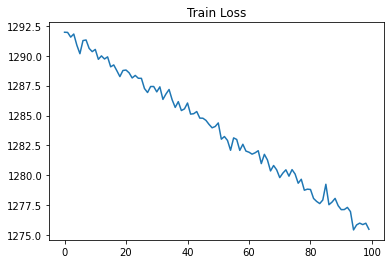

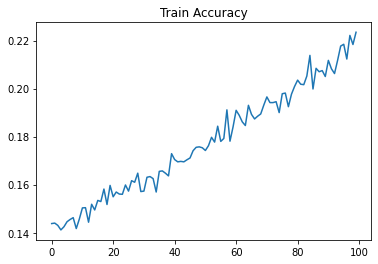

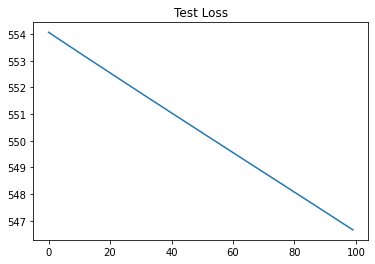

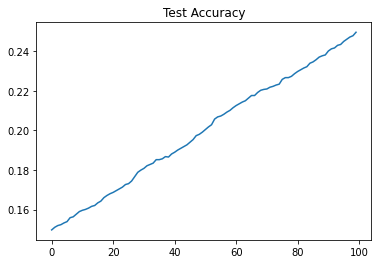

In [19]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Train Loss")
plt.show()

plt.title("Train Accuracy")
plt.plot(train_accuracy)
plt.show()

plt.plot(test_loss)
plt.title("Test Loss")
plt.show()

plt.title("Test Accuracy")
plt.plot(test_accuracy)
plt.show()




In [ ]:
simple_net = 